In [28]:
import pandas as pd
import numpy as np

# Define file paths
filepath = r"Raw Web Reviews 2023-2024.xlsx"

# Read the Excel files into DataFrames
raw_df = pd.read_excel(filepath, dtype=str)

# raw_df.count()                                # 48,404 records
# raw_df['Verbatim Text'].nunique()             # 41,365 unique text reviews
# raw_df['Product Name'].nunique()              # 185 unique products
# raw_df['Product Number (SKU)'].nunique()      # 185 unique product number SKUs
# raw_df['Review Source'].nunique()             # 10 unique review source
# raw_df['Ink Supply Type'].nunique()           # 2 Ink Supply Type; IIC (Ink-In-Cap) & IPH (Ink Per Head)

raw_df.head(3)

,Product Name,Star Rating,Product Number (SKU),Response Date,Review Source,Verbatim Text (Translated),Verbatim Text,Ink Supply Type
0,HP 951XL High Yield Yellow Original Ink Cartridge,5,CN048AA,2023-02-08 14:31:40,HP US,,Quick and easy ordering.,IIC
1,HP 951XL High Yield Yellow Original Ink Cartridge,5,CN048AA,2023-03-01 15:41:23,HP US,NaN,Quick and easy ordering.,IIC
2,HP 60 Tri-color Original Ink Cartridge,1,CC643WA,2023-06-10 13:06:16,HP US,NaN,Disappointed I can no longer get 60XL Tri-colo...,IPH


In [66]:
# Get unique lower text data from Verbatim Text (Translated) & Verbatim Text
# *** potential loss of nuance from global lowercase
raw_df['text'] = raw_df['Verbatim Text (Translated)'].replace('', np.nan).fillna(raw_df['Verbatim Text']).str.lower()
unique_df = raw_df[['Product Name', 'Star Rating', 'Product Number (SKU)', 'Review Source', 'text', 'Ink Supply Type']].drop_duplicates(keep=False).reset_index(drop=True)

# Create proxy sentiment based on 'Star Rating'
unique_df['sentiment'] = unique_df['Star Rating'].astype(int).apply(lambda x: 'positive' if x >= 4 else 'negative')
# unique_df['sentiment'] = unique_df['Star Rating'].astype(int).apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

unique_df.head(3)

,Product Name,Star Rating,Product Number (SKU),Review Source,text,Ink Supply Type,sentiment
0,HP 951XL High Yield Yellow Original Ink Cartridge,5,CN048AA,HP US,quick and easy ordering.,IIC,positive
1,HP 63 Tri-color Original Ink Cartridge,4,1VV35AA,Walmart,the cartridges do not last like they use to. i...,IPH,positive
2,HP 63 Tri-color Original Ink Cartridge,4,1VV35AA,Walmart,this ink always does the job.very satisfactory.,IPH,positive


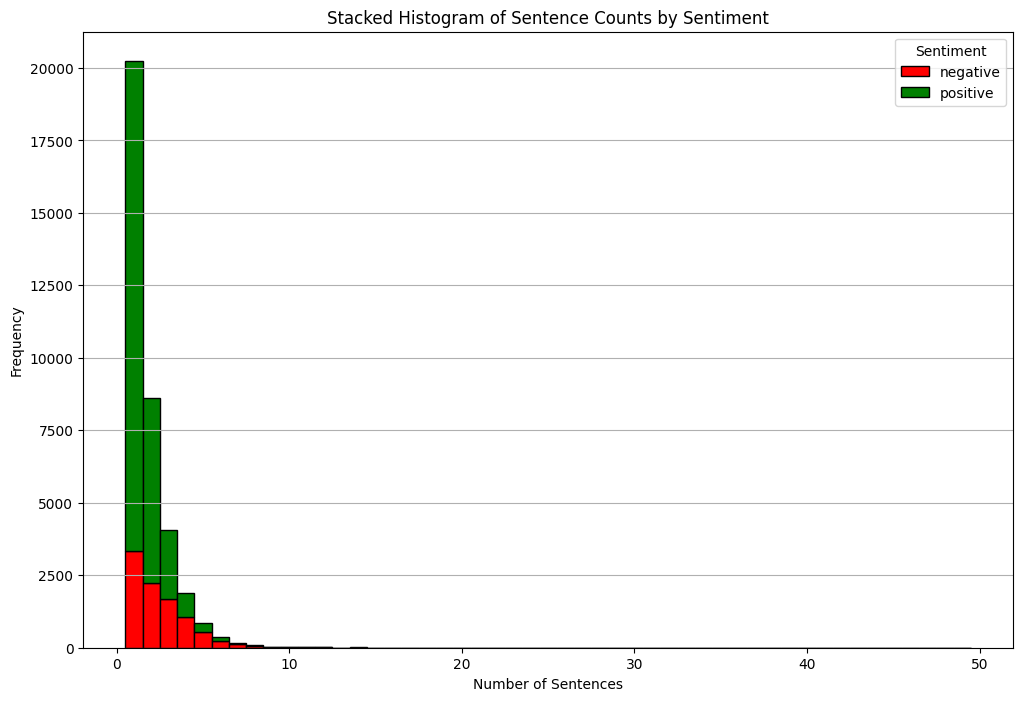

In [68]:
import re
import matplotlib.pyplot as plt

# Function to count the number of sentences
def count_sentences(text):
    # Simple sentence splitting by punctuation marks
    sentences = re.split(r'[.!?]', text)
    # Filter out empty strings from splitting
    return len([s for s in sentences if s.strip()])

# Apply the function to count sentences for each record
unique_df['sentence_count'] = df['text'].apply(count_sentences)

# Define colors for Sentiment
colors = {'negative': 'red', 'positive': 'green'}

# Create bins
bins = np.arange(1, df['sentence_count'].max() + 2) - 0.5  # Center bins on integer values
bin_centers = (bins[:-1] + bins[1:]) / 2  # For placing the labels in the center

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot histogram for each sentiment
bottoms = np.zeros(len(bins) - 1)  # Initialize bottoms to zero for stacking

for sentiment, color in colors.items():
    subset = unique_df[unique_df['sentiment'] == sentiment]
    hist, _ = np.histogram(subset['sentence_count'], bins=bins)
    plt.bar(bin_centers, hist, width=1, color=color, edgecolor='black', label=sentiment, align='center', bottom=bottoms)
    bottoms += hist  # Update the bottoms for stacking

plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Sentence Counts by Sentiment')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

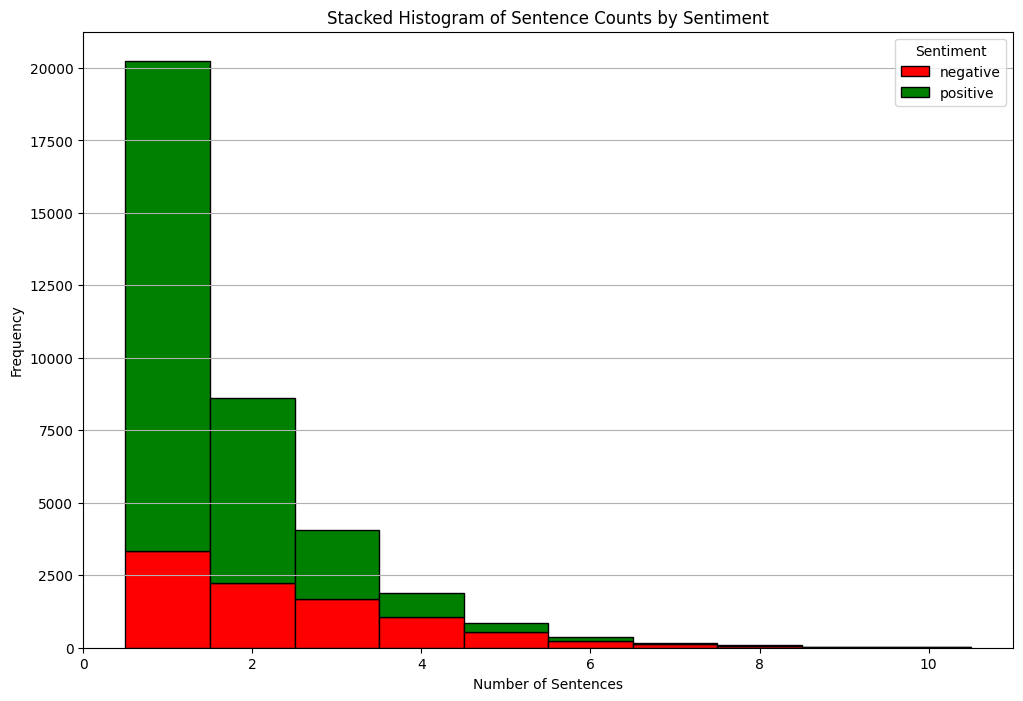

In [74]:
# Condition: Filter only reviews where no. of sentence <= 1
n = 10
filtered_df = unique_df[unique_df['sentence_count'] <= n]

# Define colors for Sentiment
colors = {'negative': 'red', 'positive': 'green'}

# Create bins
bins = np.arange(1, filtered_df['sentence_count'].max() + 2) - 0.5  # Center bins on integer values
bin_centers = (bins[:-1] + bins[1:]) / 2  # For placing the labels in the center

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot histogram for each sentiment
bottoms = np.zeros(len(bins) - 1)  # Initialize bottoms to zero for stacking

for sentiment, color in colors.items():
    subset = filtered_df[filtered_df['sentiment'] == sentiment]
    hist, _ = np.histogram(subset['sentence_count'], bins=bins)
    plt.bar(bin_centers, hist, width=1, color=color, edgecolor='black', label=sentiment, align='center', bottom=bottoms)
    bottoms += hist  # Update the bottoms for stacking

plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Sentence Counts by Sentiment')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()